In [3]:
import pandas as pd

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay

import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
data=pd.read_csv('Datasheets/bank-full.csv')
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
data_num=data.select_dtypes('int64')
data_cat=data.select_dtypes(object)

In [6]:
le=LabelEncoder()

In [7]:
for col in data_cat:
    data_cat[col]=le.fit_transform(data_cat[col])

In [8]:
data_new=pd.concat([data_num, data_cat],axis=1)
data_new

,age,balance,day,duration,campaign,pdays,previous,job,marital,education,default,housing,loan,contact,month,poutcome,Target
0,58,2143,5,261,1,-1,0,4,1,2,0,1,0,2,8,3,0
1,44,29,5,151,1,-1,0,9,2,1,0,1,0,2,8,3,0
2,33,2,5,76,1,-1,0,2,1,1,0,1,1,2,8,3,0
3,47,1506,5,92,1,-1,0,1,1,3,0,1,0,2,8,3,0
4,33,1,5,198,1,-1,0,11,2,3,0,0,0,2,8,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0,9,1,2,0,0,0,0,9,3,1
45207,71,1729,17,456,2,-1,0,5,0,0,0,0,0,0,9,3,1
45208,72,5715,17,1127,5,184,3,5,1,1,0,0,0,0,9,2,1
45209,57,668,17,508,4,-1,0,1,1,1,0,0,0,1,9,3,0


In [9]:
X=data_new.drop('Target',axis=1)
y=data_new['Target']

In [10]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [11]:
X_train.shape

(36168, 16)

In [12]:
model=LogisticRegression().fit(X_train,y_train)

e:\Code2025\Machine-Learning_LearningRepository\.TheEnvForMachineLearning\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [13]:
model.score(X_train,y_train)

0.8882990488829905

In [14]:
y_pred=model.predict(X_test)


In [15]:
acc=accuracy_score(y_test,y_pred)
cm=confusion_matrix(y_test,y_pred)

<Axes: >

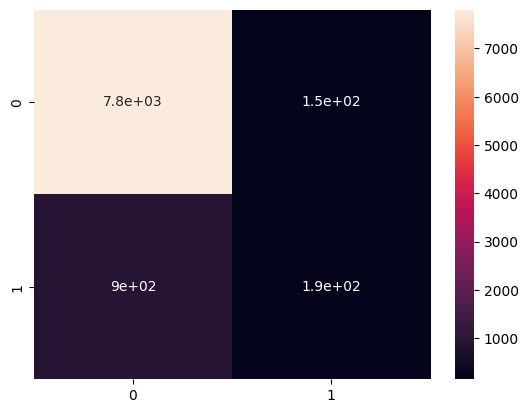

In [16]:


sns.heatmap(data=cm, annot=True)

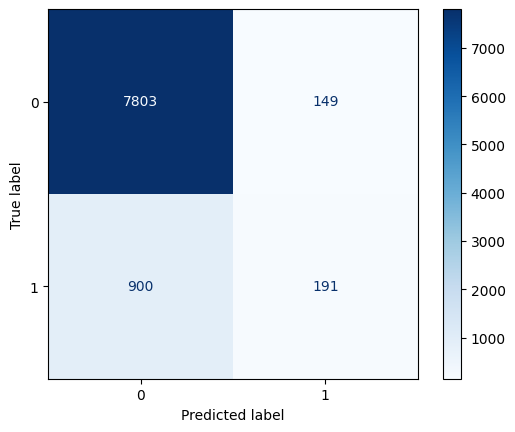

In [17]:


disp=ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.show()